In [2]:
from ultralytics import YOLO
from PIL import Image
import supervision as sv

In [3]:
model = YOLO("../Models/TFT-ID/weights/best.pt")

In [4]:
image = Image.open("../data/pdf_pic.png")
results=model.predict(image,conf=0.25)[0]


0: 640x448 2 figures, 3 texts, 81.6ms
Speed: 3.1ms preprocess, 81.6ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 448)


In [5]:
detection = sv.Detections.from_ultralytics(results)

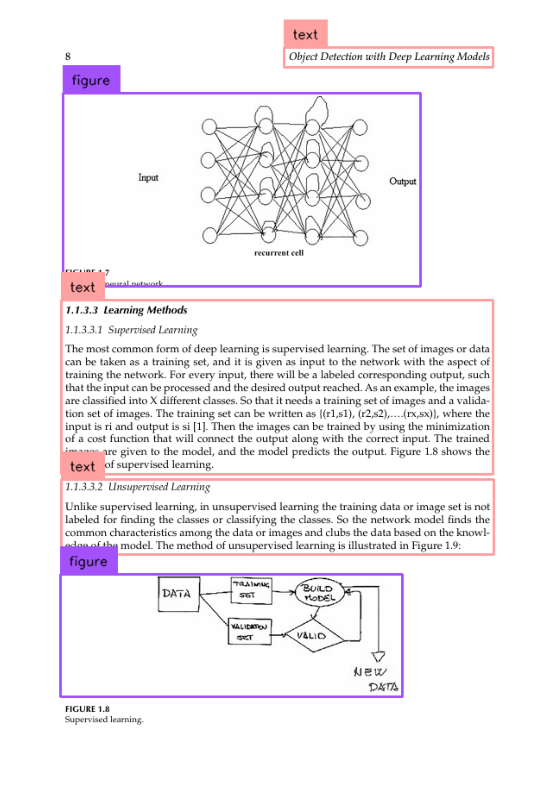

In [6]:
box_annotator = sv.BoxAnnotator()
label_annotator = sv.LabelAnnotator(text_color=sv.Color.BLACK)

annotated_image = image.copy()
annotated_image = box_annotator.annotate(annotated_image, detections=detection)
annotated_image= label_annotator.annotate(annotated_image, detections = detection)

sv.plot_image(annotated_image, size = (10,10))

In [10]:
bboxes = results.boxes.xyxy
bboxes

tensor([[ 59.0332, 336.1665, 559.3902, 538.0543],
        [ 59.3409, 544.5091, 560.8142, 631.3464],
        [ 58.5200, 654.7700, 454.4015, 796.5027],
        [ 61.8585,  96.8753, 475.3271, 320.7460],
        [317.8896,  43.0563, 559.4473,  66.0272]])